#### Ejercicio de análisis de datos en Python.  
1. El archivo con los datos se puede descargar desde aquí:https://datos.gob.ar/dataset/turismo-encuesta-ocupacion-hotelera-parahotelera-eoh  
2. Usé Anaconda Navigator, con las librerías Numpy, Pandas y MatPlotLib.  
3. 

In [1]:
##Realizo el llamado a las librerías que usaré
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##Cargo el archivo con los datos que analizaré
viajerosArgentina=pd.read_csv("viajeros-hospedados-residentes-y-no-residentes-por-destino.csv",delimiter=',')
viajerosArgentina

,indice_tiempo,region_de_destino,origen_viajeros,viajeros,observaciones
0,2007-01,Buenos Aires,Residentes,401221,NaN
1,2007-01,Buenos Aires,No residentes,12889,NaN
2,2007-01,CABA,Residentes,139181,NaN
3,2007-01,CABA,No residentes,196750,NaN
4,2007-01,Córdoba,Residentes,255307,NaN
...,...,...,...,...,...
2387,2021-10,Litoral,No residentes,1373,Dato provisorio
2388,2021-10,Norte,Residentes,201969,Dato provisorio
2389,2021-10,Norte,No residentes,1796,Dato provisorio
2390,2021-10,Patagonia,Residentes,223597,Dato provisorio


In [3]:
##Separaré la fecha en dos, mes y año
viajerosArgentinaNueva=viajerosArgentina
viajerosArgentinaNueva["AñoMes"]=viajerosArgentinaNueva['indice_tiempo'].astype(str)
viajerosArgentinaNueva["año"]=viajerosArgentinaNueva["AñoMes"].str[0:4]
viajerosArgentinaNueva["mes"]=viajerosArgentinaNueva["AñoMes"].str[5:7]
viajerosArgentinaNueva

,indice_tiempo,region_de_destino,origen_viajeros,viajeros,observaciones,AñoMes,año,mes
0,2007-01,Buenos Aires,Residentes,401221,NaN,2007-01,2007,01
1,2007-01,Buenos Aires,No residentes,12889,NaN,2007-01,2007,01
2,2007-01,CABA,Residentes,139181,NaN,2007-01,2007,01
3,2007-01,CABA,No residentes,196750,NaN,2007-01,2007,01
4,2007-01,Córdoba,Residentes,255307,NaN,2007-01,2007,01
...,...,...,...,...,...,...,...,...
2387,2021-10,Litoral,No residentes,1373,Dato provisorio,2021-10,2021,10
2388,2021-10,Norte,Residentes,201969,Dato provisorio,2021-10,2021,10
2389,2021-10,Norte,No residentes,1796,Dato provisorio,2021-10,2021,10
2390,2021-10,Patagonia,Residentes,223597,Dato provisorio,2021-10,2021,10


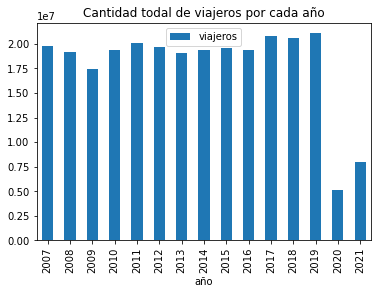

In [15]:
viajerosAnios=viajerosArgentinaNueva.groupby("año").sum("viajeros")
viajerosAnios.plot(kind="bar");
plt.title("Cantidad todal de viajeros por cada año")
plt.show()

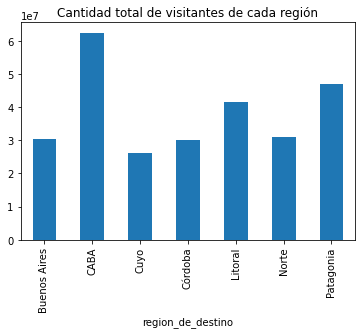

In [17]:
viajerosProvincias=viajerosArgentinaNueva.groupby("region_de_destino")["viajeros"].sum()
viajerosProvincias.plot(kind="bar")
plt.title("Cantidad total de visitantes de cada región")
plt.show()

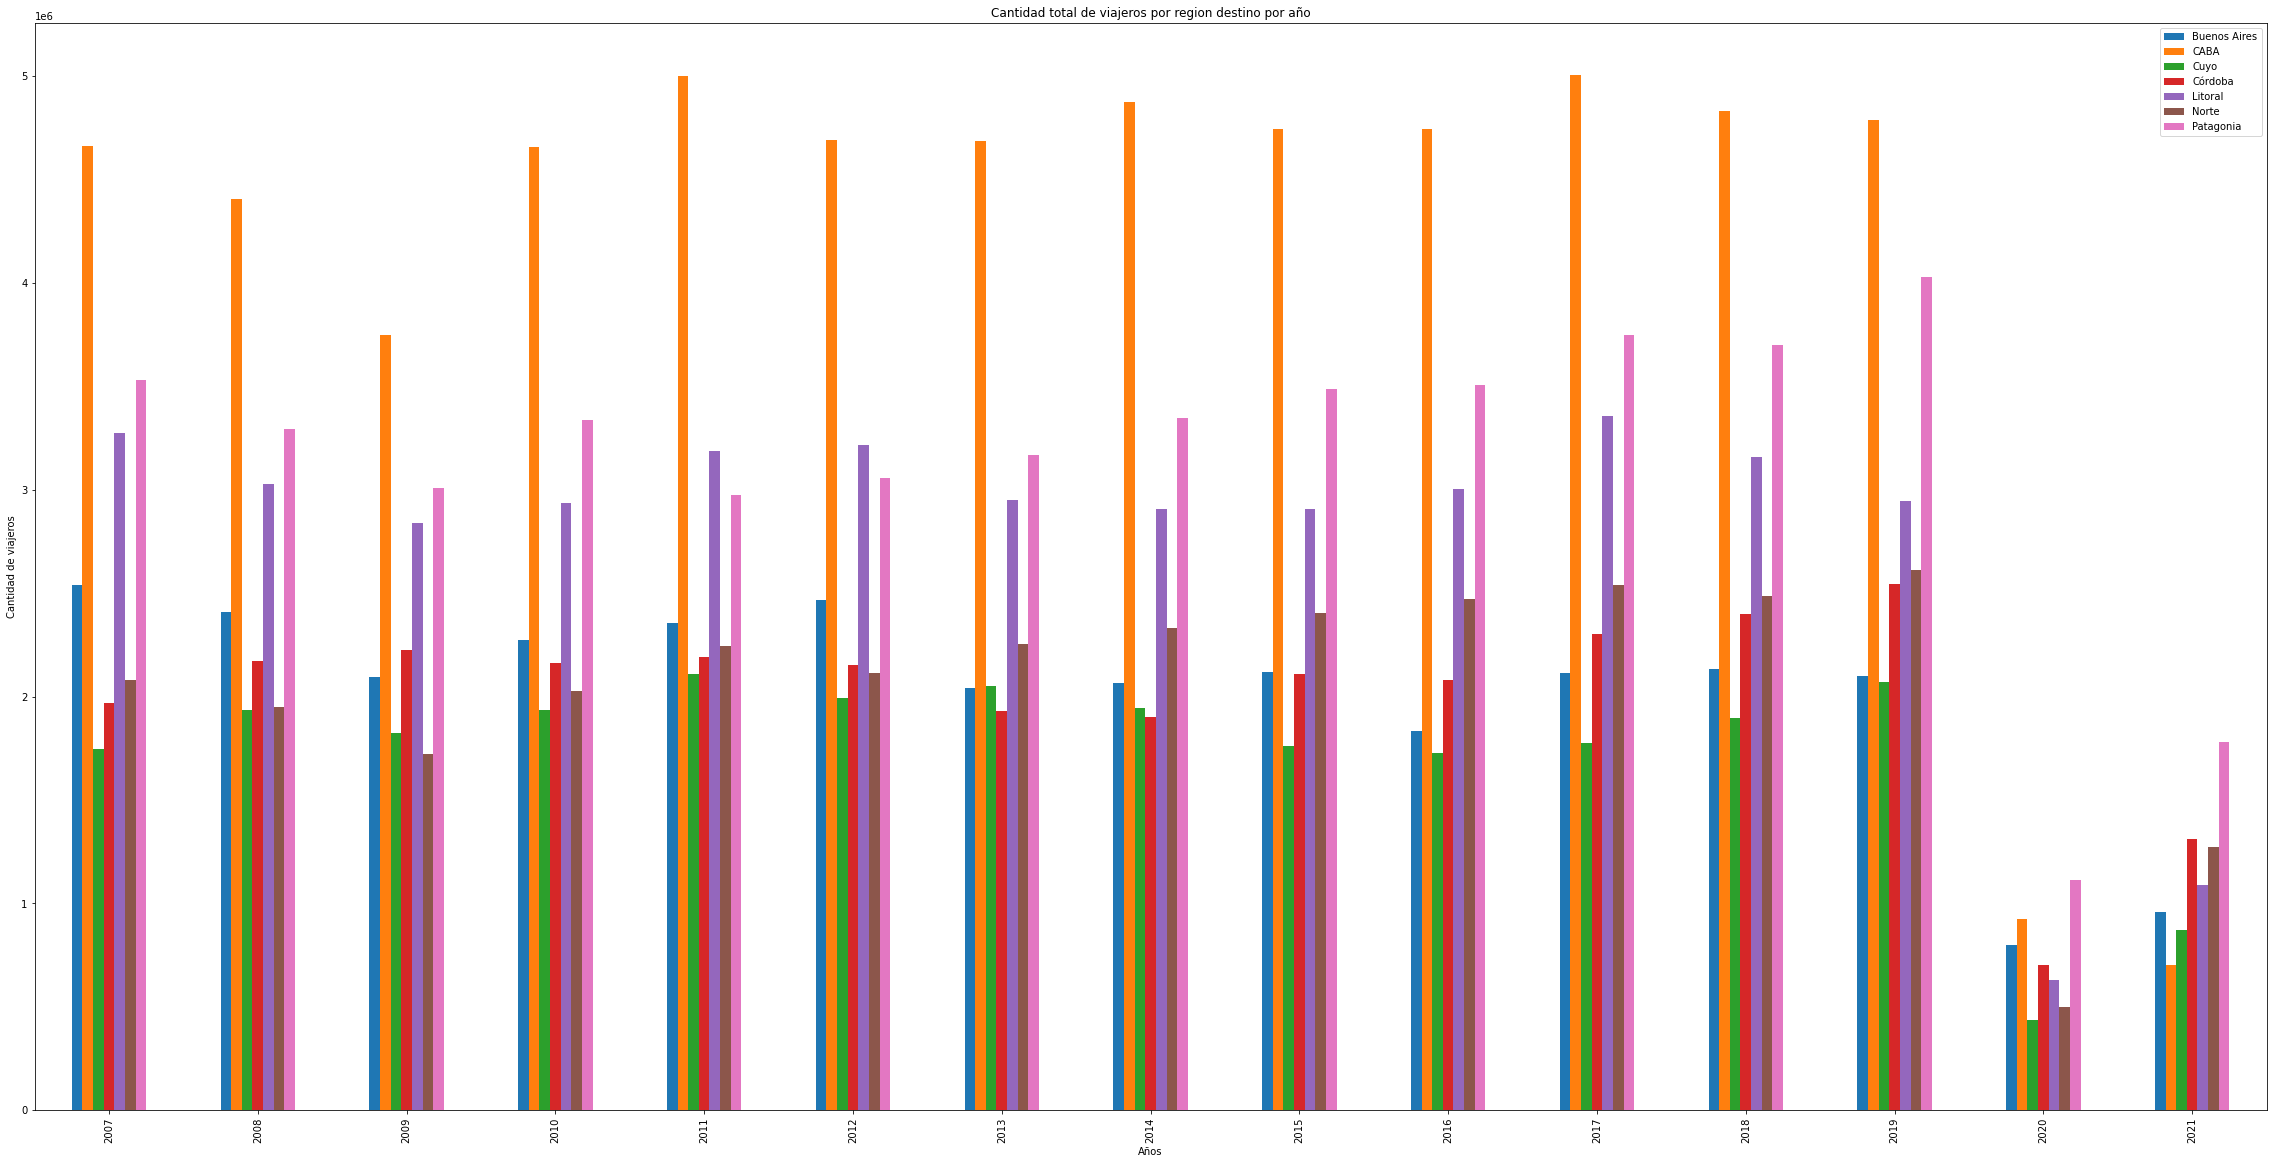

In [57]:
filtroBuenosAires=viajerosArgentinaNueva["region_de_destino"]=="Buenos Aires"
auxiliarBuenosAires=viajerosArgentinaNueva[filtroBuenosAires]
viajerosBuenosAires=auxiliarBuenosAires.groupby("año")["viajeros"].sum()

filtroCABA=viajerosArgentinaNueva["region_de_destino"]=="CABA"
auxiliarCABA=viajerosArgentinaNueva[filtroCABA]
viajerosCABA=auxiliarCABA.groupby("año")["viajeros"].sum()

filtroCuyo=viajerosArgentinaNueva["region_de_destino"]=="Cuyo"
auxiliarCuyo=viajerosArgentinaNueva[filtroCuyo]
viajerosCuyo=auxiliarCuyo.groupby("año")["viajeros"].sum()

filtroCordoba=viajerosArgentinaNueva["region_de_destino"]=="Córdoba"
auxiliarCordoba=viajerosArgentinaNueva[filtroCordoba]
viajerosCordoba=auxiliarCordoba.groupby("año")["viajeros"].sum()

filtroLitoral=viajerosArgentinaNueva["region_de_destino"]=="Litoral"
auxiliarLitoral=viajerosArgentinaNueva[filtroLitoral]
viajerosLitoral=auxiliarLitoral.groupby("año")["viajeros"].sum()

filtroNorte=viajerosArgentinaNueva["region_de_destino"]=="Norte"
auxiliarNorte=viajerosArgentinaNueva[filtroNorte]
viajerosNorte=auxiliarNorte.groupby("año")["viajeros"].sum()

filtroPatagonia=viajerosArgentinaNueva["region_de_destino"]=="Patagonia"
auxiliarPatagonia=viajerosArgentinaNueva[filtroPatagonia]
viajerosPatagonia=auxiliarPatagonia.groupby("año")["viajeros"].sum()

indice=["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
tablaGeneral=pd.DataFrame({"Buenos Aires":viajerosBuenosAires,"CABA":viajerosCABA,"Cuyo":viajerosCuyo,"Córdoba":viajerosCordoba,"Litoral":viajerosLitoral,"Norte":viajerosNorte,"Patagonia":viajerosPatagonia},index=indice)
tablaGeneral.plot(kind="bar",figsize=(40,20))
plt.title("Cantidad total de viajeros por region destino por año")
plt.xlabel("Años")
plt.ylabel("Cantidad de viajeros")
plt.show()
